In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import IPython.display

# 2D 전자쌍 배열 모델

이차원 평면에서 전자쌍이 배열될 때 임의의 원자핵으로 부터 $r$만큼 떨어진 전자쌍이 있다고 가정할 것이다. 이 전자쌍은 계속 중심과 $r$의 거리를 유지하며 중심의 원자핵의 전하는 고려하지 않는다.

이런 가정하에서 전자쌍은 중심으로부터 $r$ 만큼 떨어진 원 위에 항상 존재하게 된다.

## 전자쌍 업데이트

전자쌍은 다른 전자쌍과 모두 반발하게 되는데 이때 받는 힘의 합력을 통해 오일러 방법을 통해 업데이트 한다. 이때 매 동작 업데이트 다음에 길이가 $r$이 되도록 정규화를 거쳐 원 위에 있게 한다.

이때 반발하게 되는 힘의 크기는

$$|F|=k\frac{1}{d^2}$$

이라고 한다.

In [2]:
class Field:
    def __init__(self):
        self.pairs = []
    
    def add_pair(self, pair):
        self.pairs.append(pair)
    
    def update(self, dt):
        for p1 in self.pairs:
            for p2 in self.pairs:
                if p1 is p2:
                    continue
                else:
                    p1.apply_repulsion(p2)
        for p in self.pairs:
            p.update(dt)

In [3]:
class ElectronPair2D:
    def __init__(self, init_theta, r=1):
        self.r = r
        self.position = self.r*np.array([np.cos(init_theta), np.sin(init_theta)], dtype=np.float64)
        self.velocity = np.zeros(2, dtype=np.float64)
        self.acceleration = np.zeros(2, dtype=np.float64)

    def apply_force(self, force: np.ndarray):
        self.acceleration += force

    def apply_repulsion(self, other: 'ElectronPair2D'):
        d = self.position - other.position
        rdsq = 1 / np.sum(d ** 2)
        self.apply_force(rdsq * d)

    def update(self, dt):
        self.velocity += self.acceleration * dt
        self.position += self.velocity * dt
        self.acceleration = np.zeros(2, dtype=np.float64)
        
        posr = np.sqrt(np.sum(self.position ** 2))
        self.position *= self.r/posr

In [4]:
f2d: Field = Field()

f2d.add_pair(ElectronPair2D(0, 0.5))
f2d.add_pair(ElectronPair2D(-1))
f2d.add_pair(ElectronPair2D(1))
t, dt = np.linspace(0, 100, 10000, retstep=True)

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))

P = np.array([p.position for p in f2d.pairs])
sc = ax.scatter(P[:, 0], P[:, 1], color='red')

def animate(frame):
    ax.set_title(t[frame])
    f2d.update(dt)
    P = np.array([p.position for p in f2d.pairs])
    sc.set_offsets(P)
    return sc,

anim = animation.FuncAnimation(fig, animate, len(t), interval=10)

plt.close()

IPython.display.HTML(anim.to_html5_video())


KeyboardInterrupt: 

In [108]:
class ElectronPair3D:
    def __init__(self, init_theta, init_phi, r=1):
        self.r = r
        self.position = self.r*np.array([np.sin(init_theta)*np.cos(init_phi), np.sin(init_theta)*np.sin(init_phi), np.cos(init_theta)],
                                        dtype=np.float64)
        self.velocity = np.zeros(3, dtype=np.float64)
        self.acceleration = np.zeros(3, dtype=np.float64)

    def apply_force(self, force: np.ndarray):
        self.acceleration += force

    def apply_repulsion(self, other: 'ElectronPair3D'):
        d = self.position - other.position
        rdsq = 1 / np.sum(d ** 2)
        self.apply_force(rdsq * d)

    def update(self, dt):
        self.velocity += self.acceleration * dt
        self.position += self.velocity * dt
        self.acceleration = np.zeros(3, dtype=np.float64)
        
        posr = np.sqrt(np.sum(self.position ** 2))
        self.position *= self.r/posr

In [109]:
f3d = Field()

f3d.add_pair(ElectronPair3D(0.1, 0))
f3d.add_pair(ElectronPair3D(0.1, 1))
f3d.add_pair(ElectronPair3D(1, 0))
f3d.add_pair(ElectronPair3D(0.2, 1))

t, dt = np.linspace(0, 10, 1000, retstep=True)

for p in f3d.pairs:
    print(p.position)

[0.09983342 0.         0.99500417]
[0.05394023 0.08400692 0.99500417]
[0.84147098 0.         0.54030231]
[0.1073415  0.16717448 0.98006658]


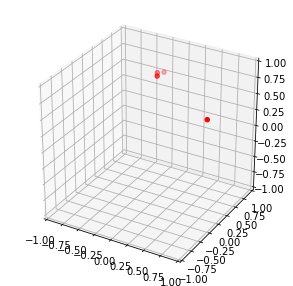

In [110]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': '3d'})
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))

P = np.array([p.position for p in f3d.pairs])
sc = ax.scatter(P[:, 0], P[:, 1], P[:, 2], color='red')

plt.show()

In [114]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': '3d'})
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))

P = np.array([p.position for p in f3d.pairs])
sc = ax.scatter(P[:, 0], P[:, 1], P[:, 2], color='red')

def animate(frame):
    #ax.set_title(t[frame])
    f3d.update(dt)
    P = np.array([p.position for p in f3d.pairs])
    sc.set_offsets(P)
    return sc,

anim = animation.FuncAnimation(fig, animate, len(t), interval=10)

plt.close()

IPython.display.HTML(anim.to_html5_video())

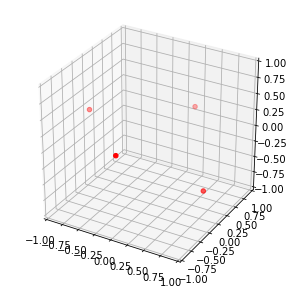

In [115]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': '3d'})
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))

P = np.array([p.position for p in f3d.pairs])
sc = ax.scatter(P[:, 0], P[:, 1], P[:, 2], color='red')

plt.show()